In [2]:
# Author: MBAN 6110T Group 2 - Balvir Owaan, Shaokun Zhang, Sushmit Richard, Tengkai Yao, Xiaoyu Deng, Xiaoyu Ma, Yuntong Zhu (sequence according to canvas name list)
# Dataset used: https://www.kaggle.com/datasets/hawkingcr/airbnb-for-boston-with-fraud-detection Airbnb for Boston with fraud detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/szhan872/Airbnb-Project/main/output.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

In [4]:
df.describe(include = 'all')

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,0.726081,58.902371,2.820363,0.859135,1.873361,0.429010,3.041283,1.220781,1.255230,...,3.909902,1570.437378,17392.580195,3.171269,19.044630,93.749791,0.165690,1.210042,1.766165,0.213947
std,11.78841,0.446030,171.119663,4.071361,0.347930,3.327397,0.538211,1.778929,0.500698,0.752129,...,0.511011,873.197307,14833.132129,8.874133,35.571658,9.039049,0.371854,0.877998,1.924877,0.410147
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,844.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,1604.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,...,4.000000,2280.000000,22000.000000,3.000000,21.000000,100.000000,0.000000,2.000000,2.130000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,...,4.000000,3091.000000,400000.000000,300.000000,404.000000,100.000000,1.000000,3.000000,19.150000,1.000000


## EDA, Data Cleaning and Feature Engineering

In [5]:
missing_values = df.isnull().sum()
duplicated  = df.duplicated().sum()
datatypes  = df.dtypes
unqiue = df.nunique()

columns  = pd.DataFrame({
    "missing_values":missing_values,
    "duplicated":duplicated,
    "datatypes":datatypes,
    "unqiue":unqiue,
})

columns

,missing_values,duplicated,datatypes,unqiue
host_response_rate,0,36,int64,52
host_identity_verified,0,36,int64,2
host_total_listings_count,0,36,int64,35
city,0,36,int64,38
is_location_exact,0,36,int64,2
property_type,0,36,int64,13
room_type,0,36,int64,3
accommodates,0,36,int64,14
bathrooms,0,36,float64,12
bedrooms,0,36,float64,6


There is no empty value in this dataset. But it has 36 rows of duplicate data.

In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3549 non-null   int64  
 1   host_identity_verified     3549 non-null   int64  
 2   host_total_listings_count  3549 non-null   int64  
 3   city                       3549 non-null   int64  
 4   is_location_exact          3549 non-null   int64  
 5   property_type              3549 non-null   int64  
 6   room_type                  3549 non-null   int64  
 7   accommodates               3549 non-null   int64  
 8   bathrooms                  3549 non-null   float64
 9   bedrooms                   3549 non-null   float64
 10  beds                       3549 non-null   float64
 11  bed_type                   3549 non-null   int64  
 12  amenities                  3549 non-null   int64  
 13  price                      3549 non-null   int64

C:\Users\13343\AppData\Local\Temp\ipykernel_6752\1239919809.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\13343\AppData\Local\Temp\ipykernel_6752\1239919809.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\13343\AppData\Local\Temp\ipykernel_6752\1239919809.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\13343\AppData\Local\Temp\ipykernel_6752\1239919809.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\13343\AppData\Local\Temp\ipykernel_6752\1239919809.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\1

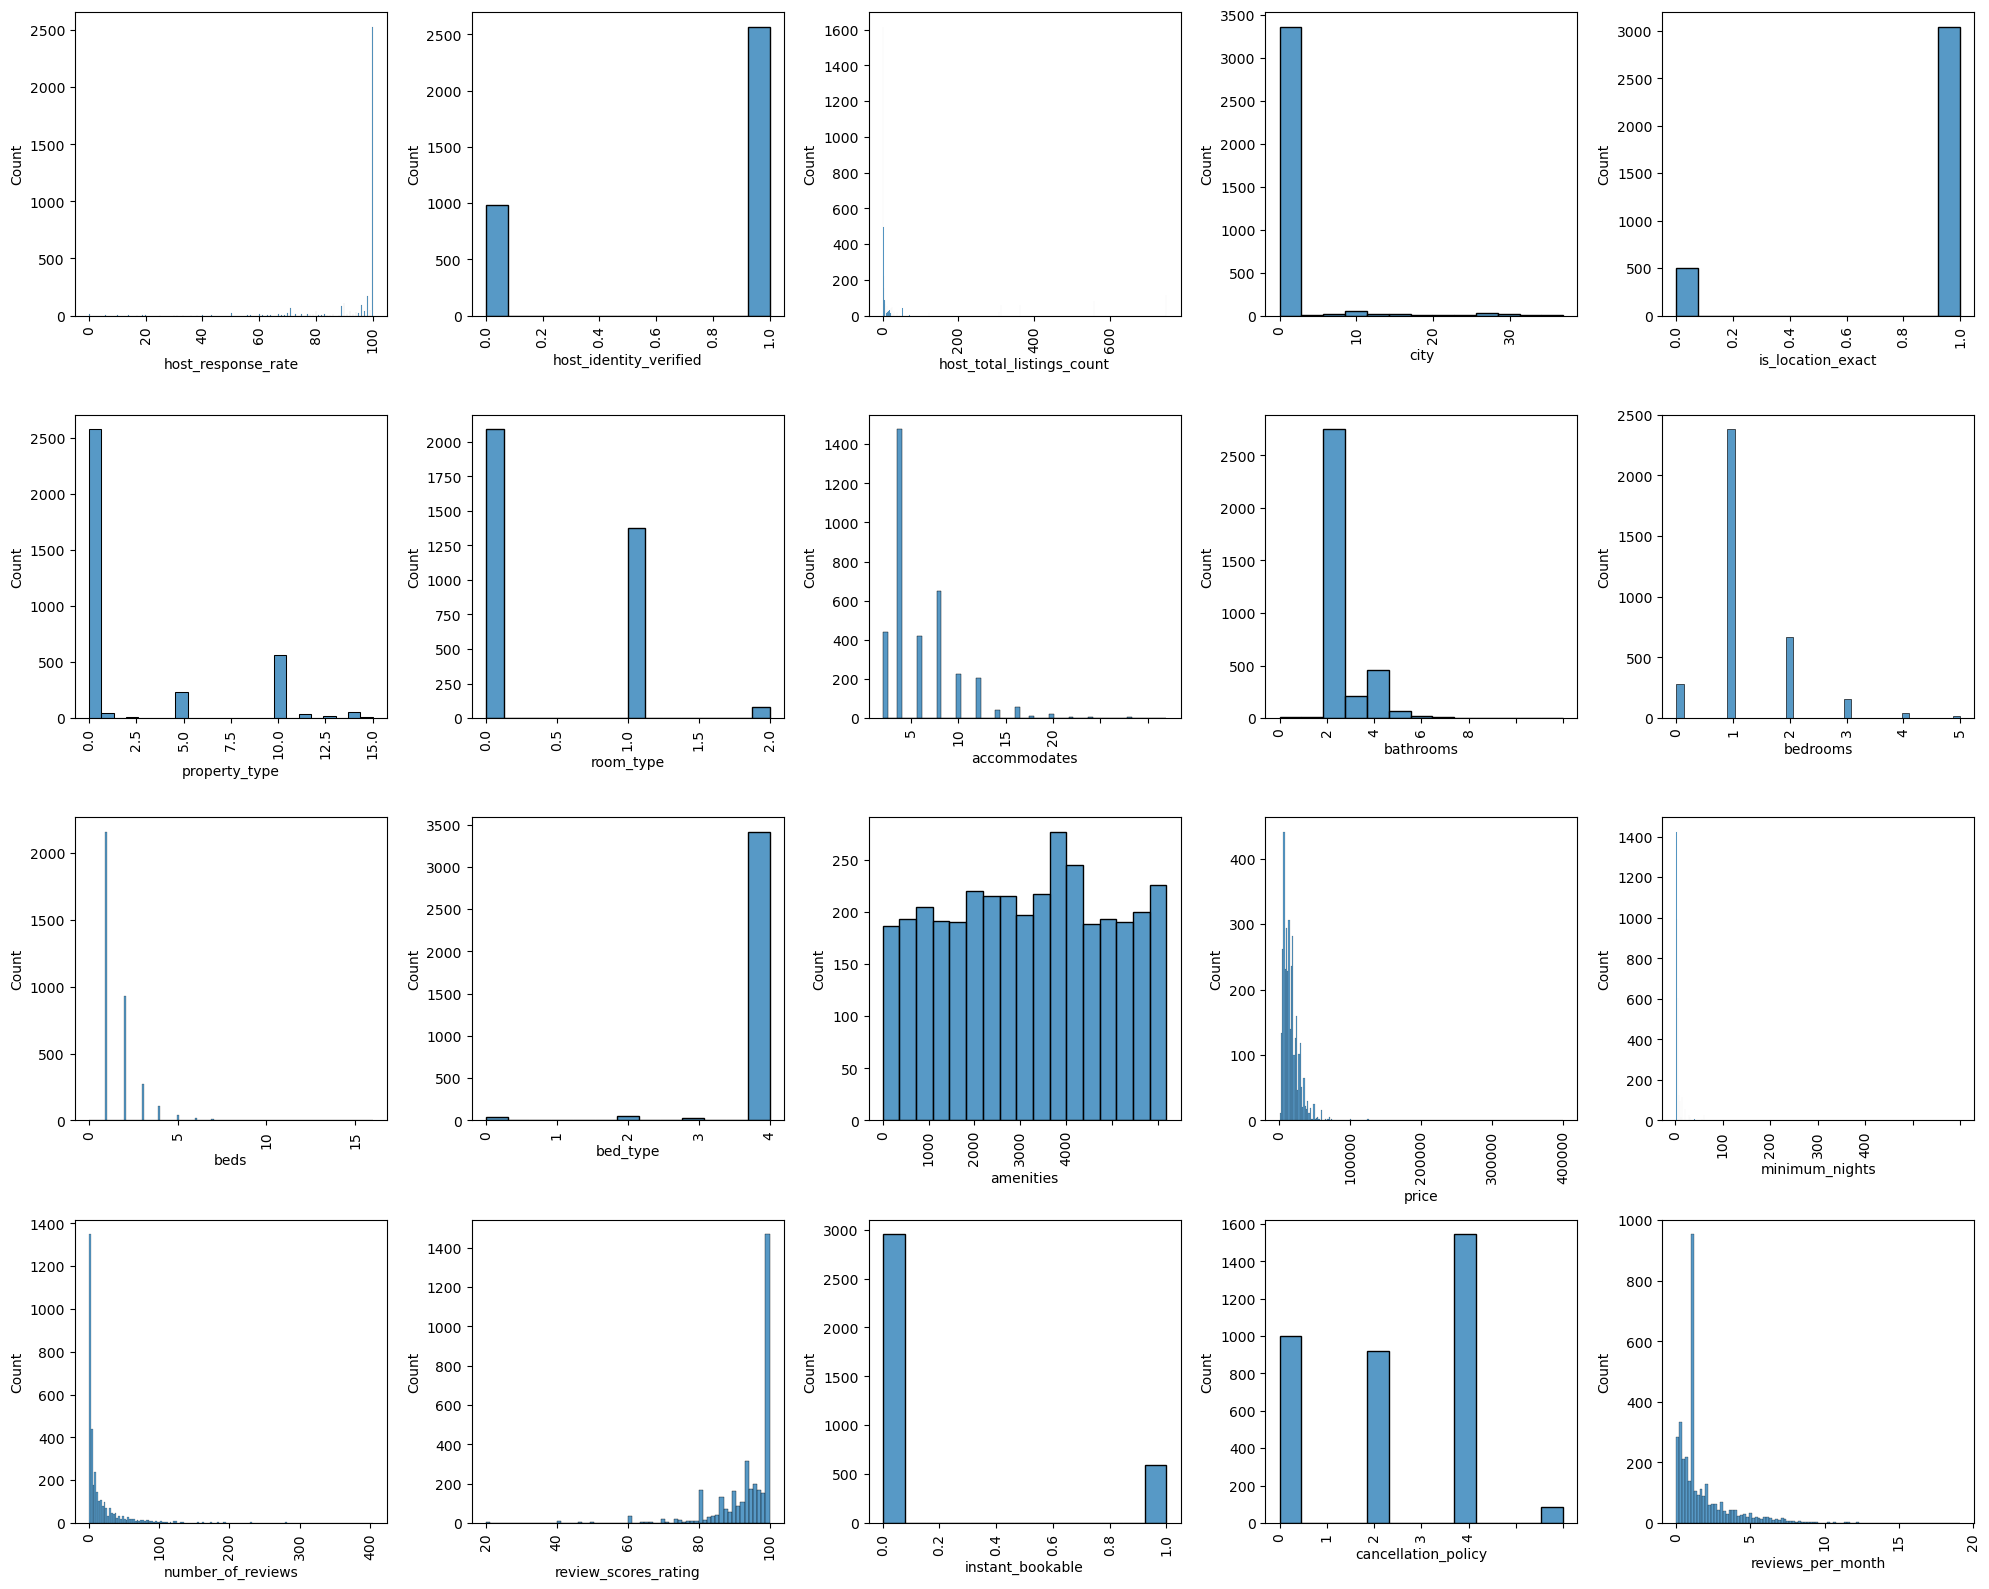

In [7]:
data = df.iloc[:, :-1] # exclude the last column because it is the target

num_cols = data.shape[1]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

axes = axes.flatten()

# Iterating over each column
for i, col in enumerate(data.columns):
    ax = axes[i]
    sns.histplot(x=data[col], ax=ax)
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    


# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

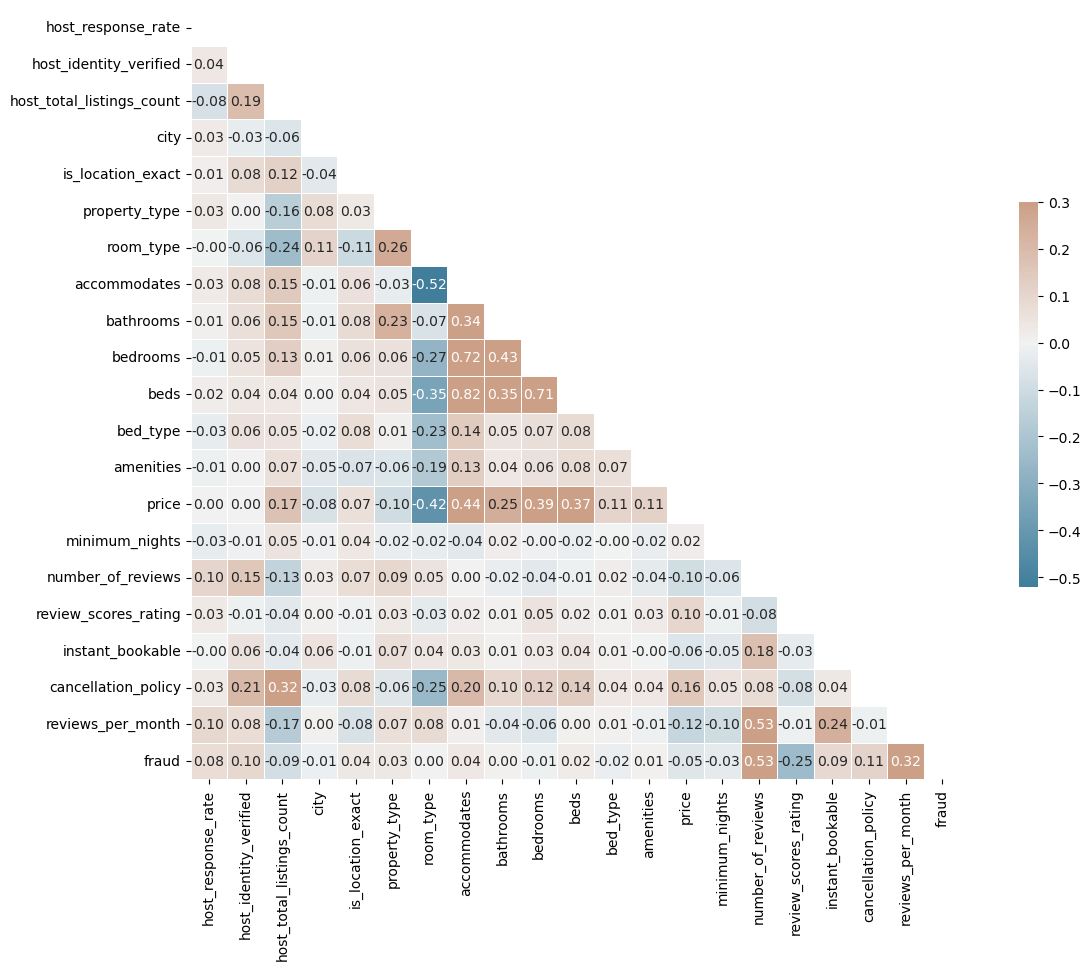

In [8]:
numerical_columns = df.select_dtypes(include=[np.number])  # select all numerical columns
corr = numerical_columns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 30, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio. Round numbers to 2 digits.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
            fmt=".2f")

plt.show()

There are 3549 observations and 21 variables.



*   Binary Variables: host_identity_verified, is_location_exact, instant_bookable, fraud.
*   Categorical Variables: property_type, room_type, bed_type, cancellation_policy, city.

Change the variables mentioned above from integer to categorical variables since the value itself is meaningless while the corresponding level may be useful to explain the association.


In [9]:
print(df.dtypes)

host_response_rate             int64
host_identity_verified         int64
host_total_listings_count      int64
city                           int64
is_location_exact              int64
property_type                  int64
room_type                      int64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                       int64
amenities                      int64
price                          int64
minimum_nights                 int64
number_of_reviews              int64
review_scores_rating         float64
instant_bookable               int64
cancellation_policy            int64
reviews_per_month            float64
fraud                          int64
dtype: object


In [10]:
# change variables from integer to categorical
categorical_variables = ['host_identity_verified', 'is_location_exact', 'instant_bookable', #'fraud',
                         'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']
df_numerical = df.copy() # other wise it creates a reference to the obejct
df_numerical[categorical_variables] = df_numerical[categorical_variables].astype('category')

C:\Users\13343\AppData\Local\Temp\ipykernel_6752\2032990475.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_numerical.corr()


<Axes: >

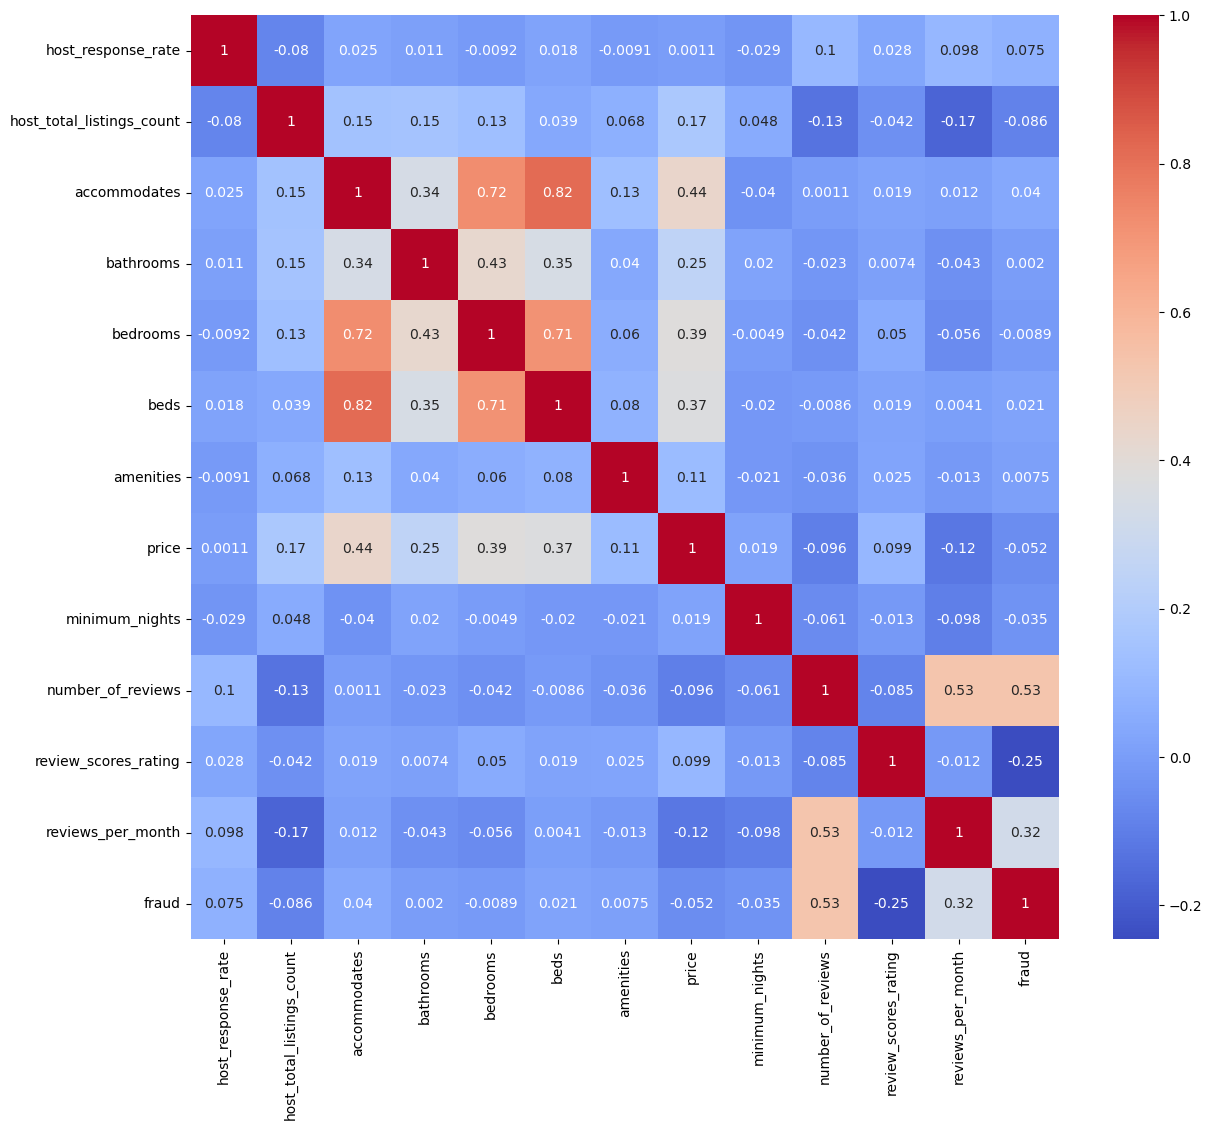

In [11]:
plt.figure(figsize=(14,12))
corr_matrix = df_numerical.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [12]:
corr_matrix = df_numerical.corr()

corr_matrix["fraud"].sort_values(ascending=False)

C:\Users\13343\AppData\Local\Temp\ipykernel_6752\3602608621.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_numerical.corr()


fraud                        1.000000
number_of_reviews            0.532263
reviews_per_month            0.321267
host_response_rate           0.075115
accommodates                 0.039517
beds                         0.021478
amenities                    0.007541
bathrooms                    0.002031
bedrooms                    -0.008856
minimum_nights              -0.034821
price                       -0.051955
host_total_listings_count   -0.085581
review_scores_rating        -0.245719
Name: fraud, dtype: float64

We can see which features have a relatively strong relationship to fraud

In [13]:
def handle_extreme_values(df, column):
    mean = df[column].mean()
    std = df[column].std()
    upper_limit = mean + 3*std
    

    extreme_values = df[column] > upper_limit
    
    df.loc[extreme_values, column] = df[column].median()


for column in [ 'review_scores_rating', 'number_of_reviews', 'reviews_per_month','price','host_response_rate','instant_bookable','host_identity_verified']:
    handle_extreme_values(df, column)

Defining extreme values as values more than 3 standard deviations from the mean is based on a common rule in statistics known as the "three sigma principle" or "rule of thumb". This principle is based on the property of the normal distribution, which states that in a normal distribution, approximately 99.7% of the data points will fall within three standard deviations of the mean. In other words, if a data point's value exceeds three standard deviations from the mean, then that data point is a very rare observation and can be considered an extreme value.

We **replace these extreme values with the median** of the corresponding column. Choose the median instead of the mean because the median is not sensitive to extreme values.

We adjusted features that were clearly associated with scams (e.g. number of reviews) and those that were clearly outliers (e.g. price).

**The main reason for choosing to replace data is that our total data volume is too small, and removing too much data may make our results worthless**

### Numerical Variables Analysis

In [14]:
df.describe()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3549.00000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,...,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000
mean,95.61623,0.723584,54.038039,2.828684,0.857706,1.892364,0.433362,3.031558,1.217103,1.253874,...,3.908988,1569.582981,16507.692308,3.139194,14.870386,93.686391,0.167371,1.202029,1.610082,0.216117
std,11.84358,0.447288,162.367256,4.091121,0.349400,3.338853,0.539189,1.781028,0.499428,0.751597,...,0.513516,876.729791,10195.300883,8.902631,22.765943,9.062727,0.373359,0.878810,1.553871,0.411653
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,835.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,1601.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,...,4.000000,2288.000000,21900.000000,3.000000,19.000000,100.000000,0.000000,2.000000,2.000000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,...,4.000000,3091.000000,60300.000000,300.000000,125.000000,100.000000,1.000000,3.000000,7.550000,1.000000


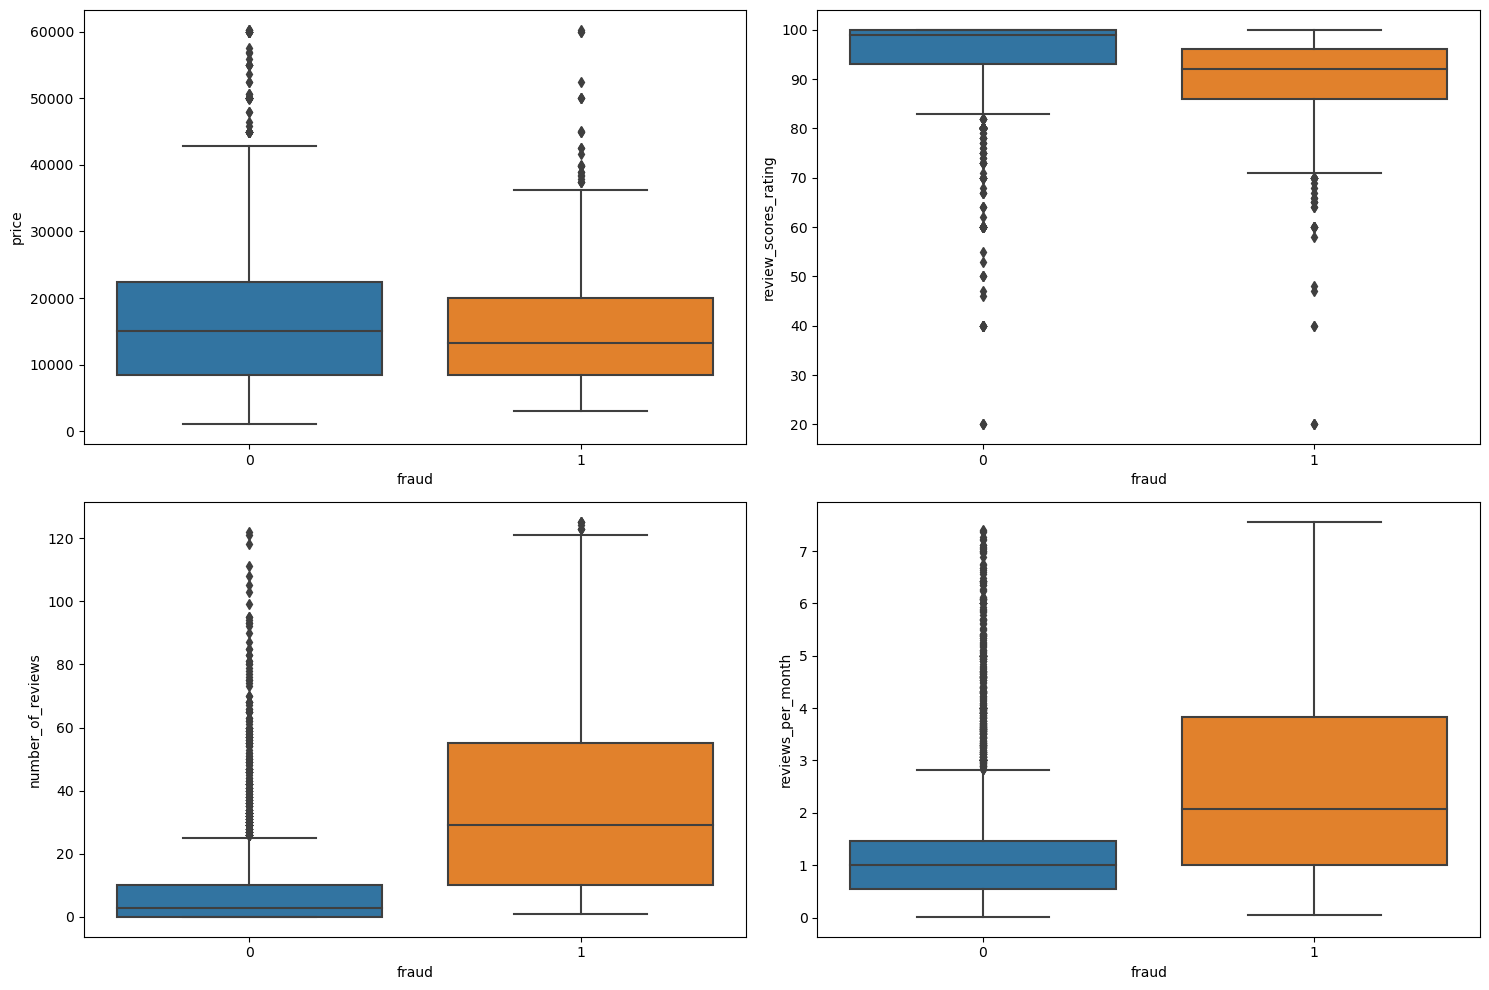

In [15]:
selected_features = ['price', 'review_scores_rating', 'number_of_reviews', 'reviews_per_month']


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(selected_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x='fraud', y=feature, data=df, ax=axs[row, col])

plt.tight_layout()
plt.show()

**Some Key Insights:**

- price: Fraud listings have a slightly lower median price than non-fraud listings and the price range is narrower. This could imply that fraudsters tend to set modest prices to attract customers, rather than opting for very high or very low prices. However, it is noteworthy that "price" is not a significant predictor for fraud detection. 

- review_scores_rating: Median ratings for non-fraud listings are slightly higher than fraudulent listings. This may be because real listings are more likely to get positive feedback.

- number_of_reviews: Fraud listings have a higher median number of reviews than non-fraud ones, possibly because scam listings tend to get more reviews by customers who would convey that the listing is a fraudulent.

- reviews_per_month: Fraud listings again have a higher median number of reviews per month due to the same reason.

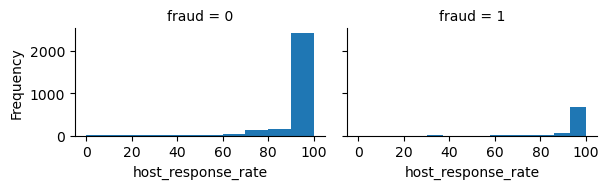

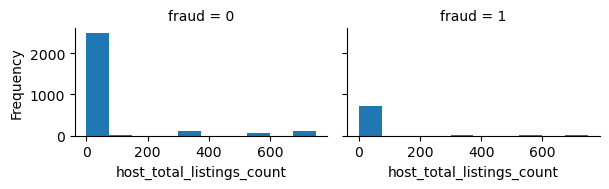

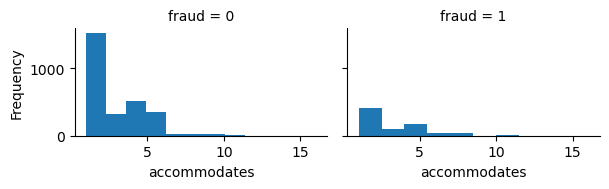

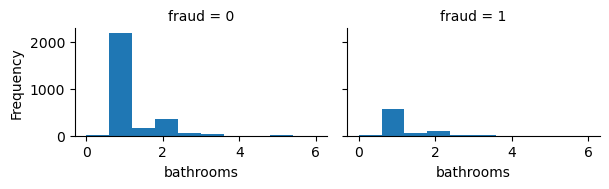

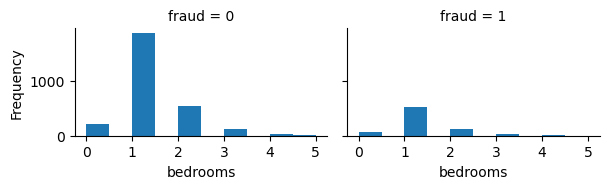

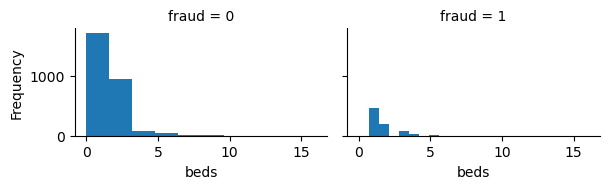

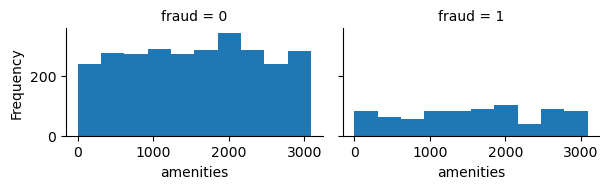

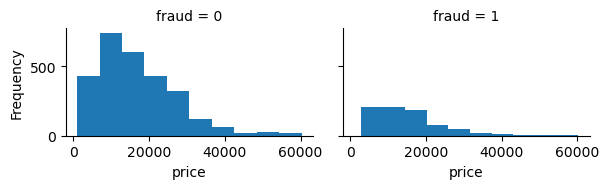

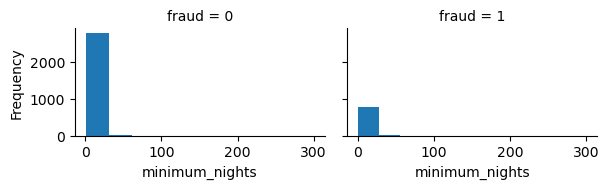

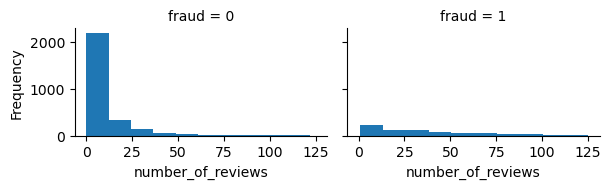

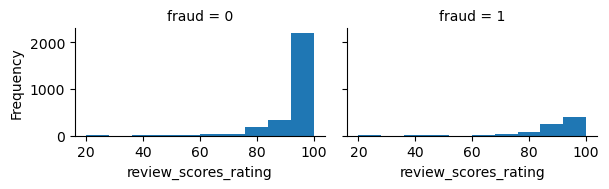

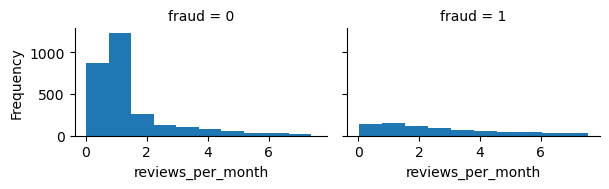

In [16]:
# numerical variables list
num_var = ['host_response_rate', 'host_total_listings_count', 'accommodates',
            'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
            'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
# plot histograms for each numerical variable group by fraud
for var in num_var :
  plot = sns.FacetGrid(df, col='fraud', height=2, aspect = 1.5)
  plot.map(plt.hist, var)
  plot.set_axis_labels(var, 'Frequency')
  plt.show()

The amenities shows a flat distribution, plus it is missing the meaning of numbers from the souce of dataset, it should be excluded.


Overall, # (fraud = 0) > # (fraud = 1)
*   host_response_rate: left-skewed, most of the observations have high response rate (e.g., rate >= 80)  
*   host_total_listings_count: right-skewed, most observations have low count. The range of # listing count for (fraud = 0) group is larger since there are some have count larger than 40 while # listing count in (fraud = 1) group concentrated from 0 to 25.
*   accommodates: right-skewed, (fraud = 1) and (fraud = 0) both have number concentrated around 2 to 4.
*   bathrooms and bedrooms (most have one or two),
*  beds: many observations have 2 beds for both fraud group.
*   amenities: (fraud = 0) has three modes (amentites = 750, 2250, 3000); (fraud = 1) has two modes (amentites = 2000, 2750). The range is relative large.
*  price: right-skewed, most are less than 20000. The range of (fraud = 0) listing is larger.
* minimum_nights, number_of_reviews, reviews_per_month: right-skewed,
reviews_per_month all have left-skewed hitograms.
*   reviews_scores_rating left-skewed.

*Interpretation: center (mean or median), range(e.g., min and max), skewness or shape*


### Categorical variables analysis

**Initial hypothesis** for **categorical variables**: every categorical variable is important

In [17]:
df.columns

Index(['host_response_rate', 'host_identity_verified',
       'host_total_listings_count', 'city', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month', 'fraud'],
      dtype='object')

<Axes: xlabel='city', ylabel='count'>

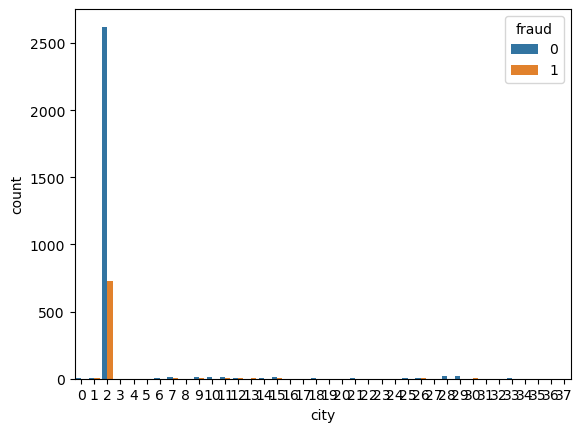

In [18]:
# Reason for why city is excluded

sns.countplot(x='city', hue='fraud', data=df)

Since the distribution of city is mostly in city 2, the distribution variation of the rest cities cannot give a valuable result, so we will **exclude the city** from the categorical analysis.

In [19]:
category_columns = ['host_identity_verified','is_location_exact','room_type','property_type', 'bed_type', 
                     'instant_bookable', 'cancellation_policy']

In [20]:
def analyze_percentage(x):
    df_percent = df.groupby(['fraud', x])[['city']].count().unstack() # no reason for "sex", it serves for count()
    df_percent = df_percent.fillna(0)
    df_percent['total'] = 0
    for i in range(0,len(df[x].unique())):
        df_percent['total'] += df_percent['city'][i]
    for i in range(0, len(df[x].unique())):
        df_percent['percent_' + str(i)] = df_percent['city'][i] / df_percent['total']
    display(df_percent)

In [21]:
for i in category_columns:
    analyze_percentage(i)

city       total percent_0 percent_1
host_identity_verified    0     1                          
fraud                                                      
0                       833  1949  2782  0.299425  0.700575
1                       148   619   767  0.192960  0.807040

city       total percent_0 percent_1
is_location_exact    0     1                          
fraud                                                 
0                  414  2368  2782  0.148814  0.851186
1                   91   676   767  0.118644  0.881356

city           total percent_0 percent_1 percent_2
room_type     0     1   2                                    
fraud                                                        
0          1642  1075  65  2782  0.590223  0.386413  0.023364
1           449   303  15   767  0.585398  0.395046  0.019557

city                                                     ...  \
property_type       0     1    2    3      4    5    6    7      8     9  ...   
fraud                                                                     ...   
0              2044.0  27.0  8.0  1.0  190.0  2.0  4.0  1.0  411.0  31.0  ...   
1               535.0  14.0  4.0  0.0   41.0  0.0  0.0  0.0  151.0   8.0  ...   

              percent_3 percent_4 percent_5 percent_6 percent_7 percent_8  \
property_type                                                               
fraud                                                                       
0              0.000359  0.068296  0.000719  0.001438  0.000359  0.147735   
1              0.000000  0.053455  0.000000  0.000000  0.000000  0.196871   

              percent_9 percent_10 percent_11 percent_12  
property_type                                             
fraud                                                     
0              0.011143   0.005392   0.015457   0.001797  
1              0.010430   0.002608   0.014342   0.001304  

[2 rows x 27 columns]

city                  total percent_0 percent_1 percent_2 percent_3  \
bed_type    0  1   2   3     4                                                 
fraud                                                                          
0          31  8  33  24  2686  2782  0.011143  0.002876  0.011862  0.008627   
1           9  2  18   7   731   767  0.011734  0.002608  0.023468  0.009126   

         percent_4  
bed_type            
fraud               
0         0.965492  
1         0.953064

city      total percent_0 percent_1
instant_bookable     0    1                          
fraud                                                
0                 2364  418  2782  0.849748  0.150252
1                  591  176   767  0.770535  0.229465

city                total percent_0 percent_1 percent_2  \
cancellation_policy    0    1     2   3                                       
fraud                                                                         
0                    880  668  1165  69  2782  0.316319  0.240115  0.418763   
1                    119  251   381  16   767  0.155150  0.327249  0.496741   

                    percent_3  
cancellation_policy            
fraud                          
0                    0.024802  
1                    0.020860

Refined hypothesis: host_identity_verified, is_location_exact, instant_bookable, property_type and cancellation_policy are the most importnat categorical variables

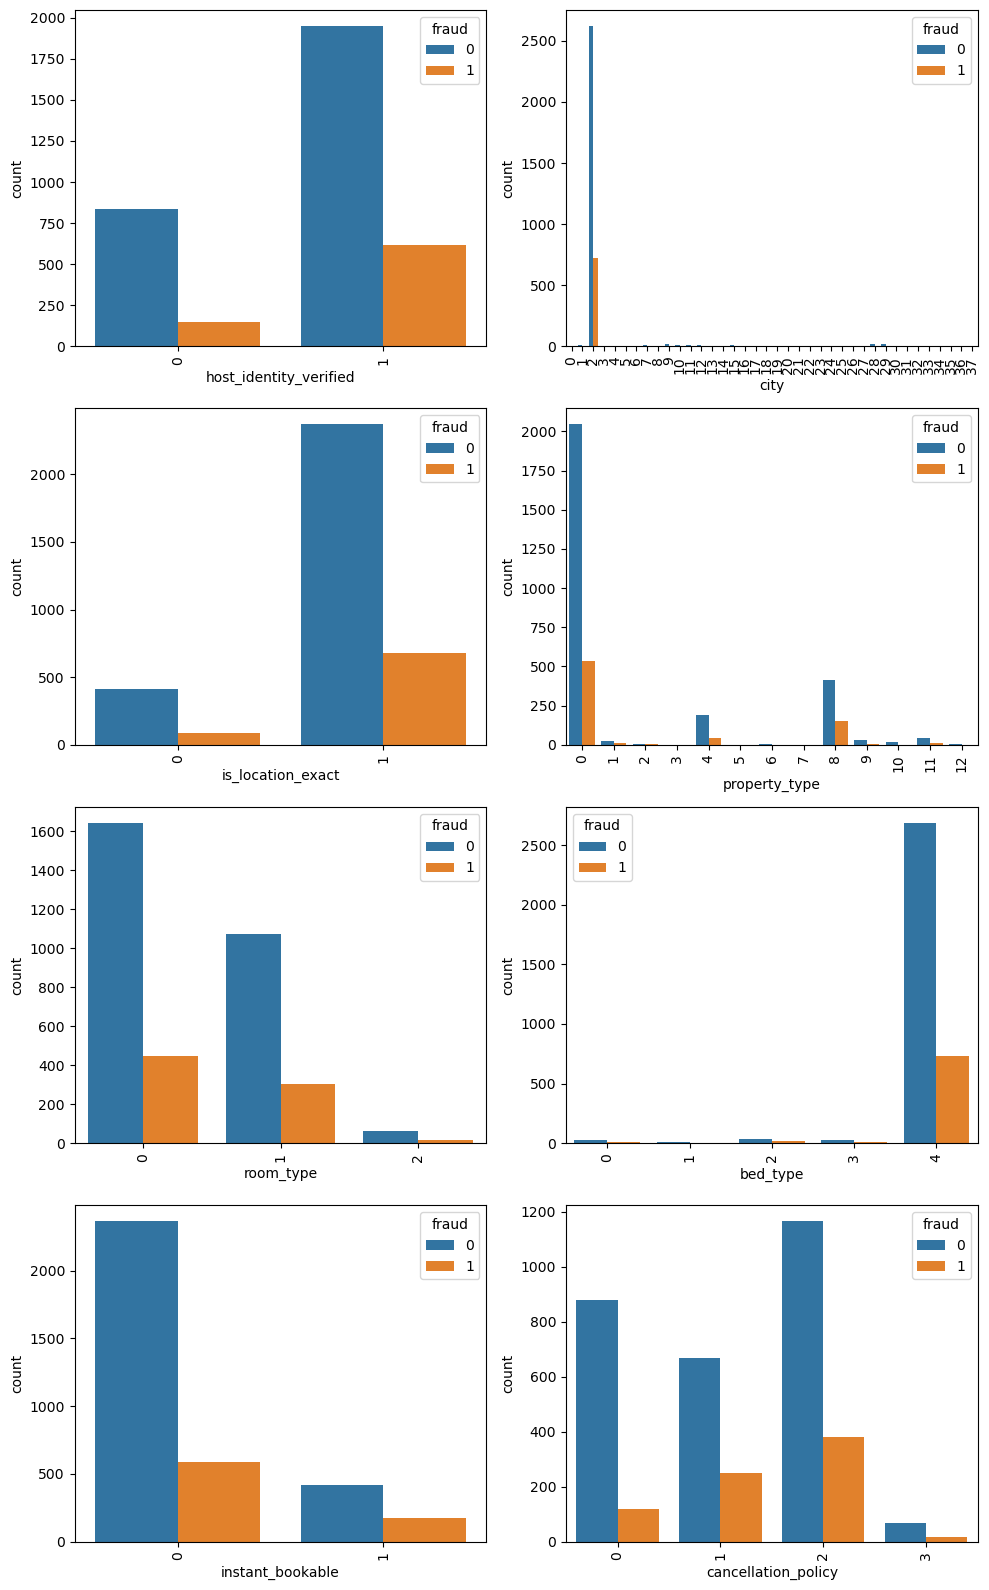

In [22]:
selected_features = ['host_identity_verified', 'city', 'is_location_exact', 'property_type', 
                     'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy']


fig, axs = plt.subplots(4, 2, figsize=(10, 16))

for i, feature in enumerate(selected_features):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, hue='fraud', data=df, ax=axs[row, col])
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

Overall, the distribution of non-fraud and fraud is biased. This could influence the performance of trained models. We cannot solely rely on accuracy score, and we need to value metrics like f1, and roc curve. To improve the accuracy and precision on this dataset, **cross-validation** will be used to calculate a more representative accuracy score. Also, we will use an **ROC curve** to monitor the prediction results when evaluating the model's performance with a rare positive class.

**Key note for modelling:** Since SVM works the best with well seperated data, and this dataset have little separation as analyzed in the categorical and numerical analysis, therefore, svm will not be used in this study.

## Modelling with classification models

### Naive Bayes Classifier & K-Nearest Neighbours

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3549 non-null   int64  
 1   host_identity_verified     3549 non-null   int64  
 2   host_total_listings_count  3549 non-null   int64  
 3   city                       3549 non-null   int64  
 4   is_location_exact          3549 non-null   int64  
 5   property_type              3549 non-null   int64  
 6   room_type                  3549 non-null   int64  
 7   accommodates               3549 non-null   int64  
 8   bathrooms                  3549 non-null   float64
 9   bedrooms                   3549 non-null   float64
 10  beds                       3549 non-null   float64
 11  bed_type                   3549 non-null   int64  
 12  amenities                  3549 non-null   int64  
 13  price                      3549 non-null   int64

In [24]:
cat_columns = ['property_type',
               'host_identity_verified',
               'is_location_exact',
               'instant_bookable',
               'cancellation_policy',
               ]
num_columns = ['host_total_listings_count',
               'bathrooms',
               'bedrooms',
               'beds',
               'price',
               'minimum_nights',
               'number_of_reviews',
               'review_scores_rating',
               'reviews_per_month']
target = 'fraud'

In [25]:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [26]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)


In [27]:
# x_train_transformed = preprocessor.fit_transform(X_train)
# x_test_transformed = preprocessor.fit_transform(X_test)

preprocessor.fit(df[cat_columns + num_columns])
x_train_transformed = preprocessor.transform(X_train)
x_test_transformed = preprocessor.transform(X_test)

c:\Users\13343\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
print(X_train.shape, X_test.shape)

(2839, 14) (710, 14)


In [29]:
print(x_train_transformed.shape, x_test_transformed.shape)

(2839, 32) (710, 32)


In [30]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [31]:
# Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()

# Define GridSearchCV
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='roc_auc')
# Use randomized search for knn because there are too many parameters.
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

# Fit models
gridsearch_nb.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)

# Get the best parameters
print("Best parameters for Naive Bayes: ", gridsearch_nb.best_params_)
print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for Naive Bayes:  {'var_smoothing': 1.0}
Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 78}


Since randomized searching is used for KNN, the run-time result may vary.

In [32]:
# Apply the best parameters
nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)

print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for Naive Bayes:  [0.86461043 0.83887649 0.80301339 0.76930804 0.84206182]
Cross-validation scores for KNN:  [0.85525257 0.88061756 0.84255952 0.81045387 0.85106543]
Test accuracy for Naive Bayes:  0.8183098591549296
Test accuracy for KNN:  0.819718309859155


In [33]:
# Compute metrics
print("Naive Bayes Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Precision: ", precision_score(y_test, y_pred_nb))
print("Recall: ", recall_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))

Naive Bayes Metrics: 
Confusion Matrix:  [[535   6]
 [123  46]]
Accuracy:  0.8183098591549296
Precision:  0.8846153846153846
Recall:  0.27218934911242604
F1 Score:  0.41628959276018096

K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[529  12]
 [116  53]]
Accuracy:  0.819718309859155
Precision:  0.8153846153846154
Recall:  0.3136094674556213
F1 Score:  0.45299145299145294


## Logistic Regression Model

Use randomizedCV to find the best parameters for logistic regression, then compare the prediction performance to the other two models.

In [34]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Confusion Matrix: ', cm)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1)

params_log = {'penalty':['l2', 'elasticnet'], 'C':[0.01, 0.1, 1.0], 'fit_intercept':[True, False],
                 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'], 'l1_ratio':[0.00001, 0.001, 0.1, 1.0]}
randomsearch_log = RandomizedSearchCV(log_reg, params_log, cv=10, n_iter=15, scoring='f1')
randomsearch_log.fit(X_train, y_train)

print(randomsearch_log.best_params_)


Confusion Matrix:  [[527  14]
 [110  59]]
Accuracy:  0.8253521126760563
Precision:  0.8082191780821918
Recall:  0.34911242603550297
F1 score:  0.487603305785124


c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packag

{'solver': 'newton-cholesky', 'penalty': 'l2', 'l1_ratio': 1.0, 'fit_intercept': True, 'C': 0.1}


c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\13343\anaconda3\lib\site-packag

In [35]:
log_reg = LogisticRegression(solver = 'newton-cg', penalty = 'l2', l1_ratio = 1.0, fit_intercept = True, C = 0.1)
log_reg = LogisticRegression(**randomsearch_log.best_params_)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Confusion Matrix: ', cm)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1)

Confusion Matrix:  [[525  16]
 [107  62]]
Accuracy:  0.8267605633802817
Precision:  0.7948717948717948
Recall:  0.3668639053254438
F1 score:  0.5020242914979757


c:\Users\13343\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Interpretation:

**Accuracy:** 82.7%

**confusion matrix:**

**True Positives**: 525 (actual fraud, predicted fraud)

**True Negatives**: 62 (actually normal, predicted normal)

**False Positives**: 16 (actually normal, predicted as fraudulent)

**False Negatives**: 107 (actually fraud, predicted normal)

Although the model performed reasonably well in terms of overall accuracy, its performance in identifying cases of fraud could still be improved. This may be because our dataset is unbalanced, i.e. the number of fraudulent cases is much less than the number of non-fraudulent cases. We also prefer a higher recall since we want to maximize the TP and minimize FN Airbnb Listings to minimize the number actual fraud that are not detected.




Compared to the logistic regression model, the kNN model suffered a slight drop in overall accuracy, and also performed less well in identifying cases of fraud. This may be because kNN models generally perform poorly on imbalanced datasets, as it is more likely to classify new instances into classes that are more numerous in the dataset.

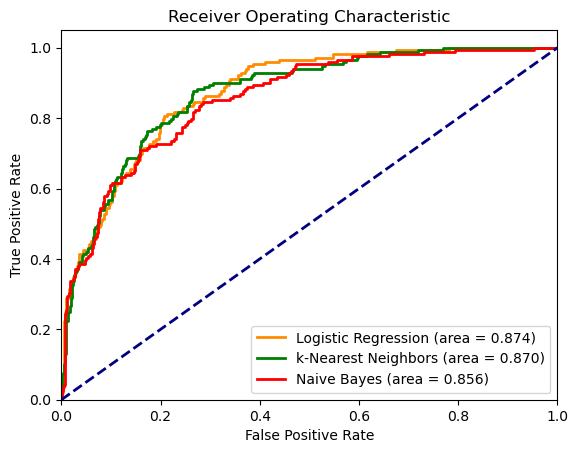

In [36]:
from sklearn.metrics import roc_curve, auc


y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
# y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_knn = knn_best.predict_proba(X_test_transformed)[:, 1]
y_prob_nb = nb_best.predict_proba(X_test_transformed)[:, 1]
# nb_best
# knn_best



fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)


plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='k-Nearest Neighbors (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes (area = %0.3f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In this graph, the orange line represents the logistic regression model, the green line represents the kNN model and red line represents the Naive Bayes model. The area under the curve (AUC) gives an overall measure of model performance. A perfect model has an AUC close to 1, so the better the model performs, the larger the area under the curve.

As can be seen from the figure, the AUC (0.874) of the logistic regression model is slightly higher than the AUC (0.870) of the kNN model and the AUC (0.856) of NB model, which means that on this dataset, the performance of the logistic regression model is slightly better than that of the kNN model.

**Naive Bayes Metrics:**
- Confusion Matrix:  [[535   6] [123  46]]
- Accuracy:  0.8183098591549296
- Precision:  0.8846153846153846
- Recall:  0.27218934911242604
- F1 Score:  0.41628959276018096

**K-Nearest Neighbors Metrics:** 

- Confusion Matrix:[[529  12] [116  53]]
- Accuracy:  0.819718309859155
- Precision:  0.8153846153846154
- Recall:  0.3136094674556213
- F1 Score:  0.45299145299145294


**Logistic:**

- Confusion Matrix: [[525  16] [107  62]]
- Accuracy:  0.8267605633802817
- Precision:  0.7948717948717948
- Recall:  0.3668639053254438
- F1 score:  0.5020242914979757


Overall, by comparing the metrics of the three models, logistic model has the highest F1 score. This is important because the target of this dataset is biased, and a higher f1 score means a better balance between precision and recall. Also, since this dataset aims at fraud detection, the recall metric is the most important metric because we want to minimize the FN predictions. This means, we don't want to miss fraudulent transactions, even if we might flag more non-fraudlant transactions as fraud (higher FP). The logistic model possess the highest recall score among the models, so it is the best model for this dataset.

## Recommendation

In [53]:
coefficients = log_reg.coef_
classes = log_reg.feature_names_in_
dictionary = dict(zip(classes, coefficients[0]))
sorted_dict = dict(sorted(dictionary.items(), key=lambda item: abs(item[1]), reverse=True))
# for i in range(0,len(coefficients[0])):
#     print(classes[i], ': ', coefficients[0][i])
for key, value in sorted_dict.items():
    print(f"{key}:     {value}")

host_identity_verified:     0.2671270322784042
cancellation_policy:     0.23287852631502462
reviews_per_month:     0.2255148160890169
is_location_exact:     0.10801962728975889
review_scores_rating:     -0.06693645492905079
instant_bookable:     0.054076030284910745
number_of_reviews:     0.04295877079050542
bedrooms:     -0.04047171701051995
beds:     0.027742094769953252
property_type:     -0.011436322969711402
host_total_listings_count:     -0.0008955389712029925
bathrooms:     0.00081881646376081
minimum_nights:     0.0003945881477347607
price:     4.15097675376974e-06


Based on the result of our modelling, the most effective model is Logistic model and should be used in this fraudulent detection scenario. The most significant coefficients are: host-identity verified, cancellation polity, reviews per month, and is location exact. By focusing on these four major variables, AirBnb can improve their ability of distinguishing fraudulent, therefore, procure customer experience and enhance Airbnb's reputation.